# A look at model comparison
see : https://docs.pymc.io/notebooks/Bayes_factor.html

In [1]:
from collections import OrderedDict
import numpy as np
import pymc3 as pm
import seaborn as sns
sns.set(font_scale=1.5)
import scipy.stats
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
data = scipy.stats.nbinom.rvs(50, 0.04, size=20)

In [3]:
with pm.Model() as modelp:
    # fit a poisson and negbin
    p_mean = pm.Uniform('p_mean', 1, 10000)
    p = pm.Poisson('p', mu=p_mean, observed=data)
    tracep = pm.sample(10000, tune=4000)

with pm.Model() as modelnb:
    # fit a poisson and negbin
    nb_mean = pm.Uniform('nb_mean', 1, 10000)
    nb_alpha = pm.Uniform('nb_alpha', 1, 1000)
    nb = pm.NegativeBinomial('nb', mu=nb_mean, alpha=nb_alpha, observed=data)
    tracenb = pm.sample(10000, tune=4000)
    
    

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [p_mean_interval__]
100%|██████████| 14000/14000 [00:08<00:00, 1734.07it/s]
INFO (theano.gof.compilelock): Waiting for existing lock by process '67496' (I am process '67497')
INFO (theano.gof.compilelock): To manually release the lock, delete /Users/balarsen/.theano/compiledir_Darwin-15.6.0-x86_64-i386-64bit-i386-3.6.5-64/lock_dir
INFO (theano.gof.compilelock): Waiting for existing lock by process '67496' (I am process '67498')
INFO (theano.gof.compilelock): To manually release the lock, delete /Users/balarsen/.theano/compiledir_Darwin-15.6.0-x86_64-i386-64bit-i386-3.6.5-64/lock_dir
INFO (theano.gof.compilelock): Waiting for existing lock by process '67497' (I am process '67498')
INFO (theano.gof.compilelock): To manually release the lock, delete /Users/balarsen/.theano/compiledir_Darwin-15.6.0-x86_64-i386-64bit-i386-3.6.5-64/lock_dir
The acceptance probability d

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x114134860>,
      dtype=object)

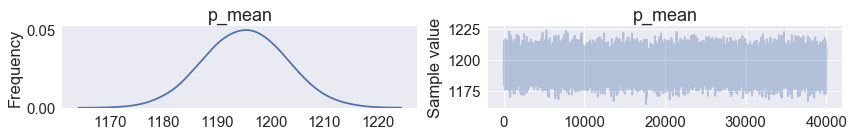

In [4]:
pm.traceplot(tracep, combined=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x114733908>,
      dtype=object)

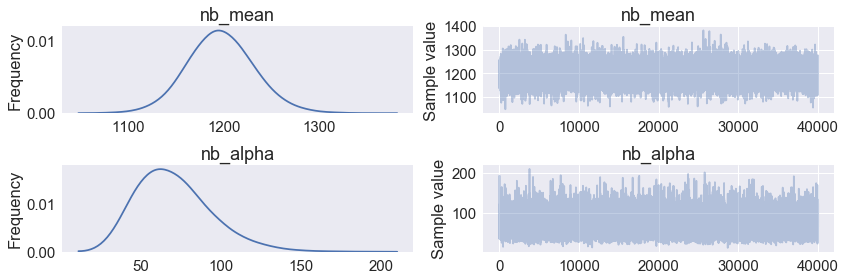

In [5]:
pm.traceplot(tracenb, combined=True)

In [6]:
ppcp = pm.sample_ppc(tracep, samples=1000, model=modelp)
ppcnb = pm.sample_ppc(tracenb, samples=1000, model=modelnb)


100%|██████████| 1000/1000 [00:00<00:00, 2657.22it/s]


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


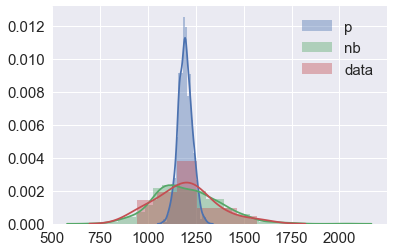

In [7]:
sns.distplot(ppcp['p'], label='p')
sns.distplot(ppcnb['nb'], label='nb')
sns.distplot(data, label='data')
plt.legend()

In [8]:
pm.stats.waic(tracep, model=modelp, progressbar=True)

40000it [00:02, 17617.45it/s]
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pymc3/stats.py:211: UserWarning: For one or more samples the posterior variance of the
        log predictive densities exceeds 0.4. This could be indication of
        WAIC starting to fail see http://arxiv.org/abs/1507.04544 for details
        
  """)


WAIC_r(WAIC=581.7808261176029, WAIC_se=128.00082275341904, p_WAIC=19.144382496165093, var_warn=1)

In [9]:
pm.stats.waic(tracenb, model=modelnb, progressbar=True)

40000it [00:03, 11834.47it/s]
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pymc3/stats.py:211: UserWarning: For one or more samples the posterior variance of the
        log predictive densities exceeds 0.4. This could be indication of
        WAIC starting to fail see http://arxiv.org/abs/1507.04544 for details
        
  """)


WAIC_r(WAIC=261.651457143125, WAIC_se=7.6084804227617315, p_WAIC=2.1798461277131467, var_warn=1)

In [10]:
pm.stats.loo(tracep, model=modelp, progressbar=True)

40000it [00:02, 15675.26it/s]
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pymc3/stats.py:292: UserWarning: Estimated shape parameter of Pareto distribution is
        greater than 0.7 for one or more samples.
        You should consider using a more robust model, this is because
        importance sampling is less likely to work well if the marginal
        posterior and LOO posterior are very different. This is more likely to
        happen with a non-robust model and highly influential observations.
  happen with a non-robust model and highly influential observations.""")


LOO_r(LOO=581.5623048285014, LOO_se=127.87373268264813, p_LOO=19.035121851614292, shape_warn=1)

In [11]:
pm.stats.loo(tracenb, model=modelnb, progressbar=True)

40000it [00:03, 11611.18it/s]


LOO_r(LOO=261.7717131147104, LOO_se=7.683217316094819, p_LOO=2.2399741135058377, shape_warn=0)

In [12]:
mods = OrderedDict()
mods[modelnb]= tracenb
mods[modelp]= tracep

pm.stats.compare(mods)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pymc3/stats.py:211: UserWarning: For one or more samples the posterior variance of the
        log predictive densities exceeds 0.4. This could be indication of
        WAIC starting to fail see http://arxiv.org/abs/1507.04544 for details
        
  """)


,WAIC,pWAIC,dWAIC,weight,SE,dSE,var_warn
0,261.65,2.18,0,0.93,7.61,0,1
1,581.78,19.14,320.13,0.07,128,120.42,1


In [13]:
mods = OrderedDict()
mods[modelp]= tracep
mods[modelnb]= tracenb

comp = pm.stats.compare(mods)
comp

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pymc3/stats.py:211: UserWarning: For one or more samples the posterior variance of the
        log predictive densities exceeds 0.4. This could be indication of
        WAIC starting to fail see http://arxiv.org/abs/1507.04544 for details
        
  """)


,WAIC,pWAIC,dWAIC,weight,SE,dSE,var_warn
1,261.65,2.18,0,0.93,7.61,0,1
0,581.78,19.14,320.13,0.07,128,120.42,1


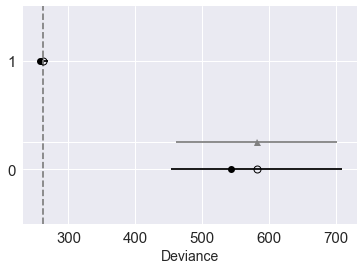

In [14]:
pm.plots.compareplot(comp)